In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/TWO_CENTURIES_OF_UM_RACES.csv')

/tmp/ipython-input-974046574.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample_data/TWO_CENTURIES_OF_UM_RACES.csv')


In [ ]:
df2 = df[(df["Event distance/length"].isin(['50km','50mi'])) & (df['Year of event'] == 2016)]

In [ ]:
df2['Event name'] = df2["Event name"].str.split('(').str.get(0)

/tmp/ipython-input-3475211509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2["Event name"].str.split('(').str.get(0)


In [ ]:
df2.shape

(142876, 13)

In [ ]:
df2["athlete_age"] = df2["Year of event"] - df2['Athlete year of birth']

/tmp/ipython-input-3223803503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["athlete_age"] = df2["Year of event"] - df2['Athlete year of birth']


In [ ]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
661485,2016,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,3:59:12 h,"*Palm Bay, FL",USA,1992.0,M,M23,12.542,299778,24.0
661486,2016,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:24:22 h,"*Madison, WL",USA,1984.0,M,M23,11.348,85207,32.0
661487,2016,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:41:06 h,"*Sisters, OR",USA,1979.0,F,W35,10.672,19193,37.0
661488,2016,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:57:22 h,"*Plainfield, IN",USA,1971.0,M,M40,10.089,208671,45.0
661489,2016,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,5:02:17 h,"*Whitefish, MT",USA,1982.0,M,M23,9.924,240512,34.0


In [ ]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

/tmp/ipython-input-2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [ ]:
df2 = df2.drop(columns=['Year of event','Athlete year of birth', 'Athlete club', 'Athlete country', 'Athlete age category'])

In [ ]:
df2.dtypes

,0
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete gender,object
Athlete average speed,object
Athlete ID,int64
athlete_age,float64


In [ ]:
df2.isna().sum()

,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete gender,0
Athlete average speed,0
Athlete ID,0
athlete_age,12234


In [ ]:
df2 = df2.dropna()

In [ ]:
df2[df2.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [ ]:
df2.reset_index(drop=True)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,3:59:12,M,12.542,299778,24.0
1,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:24:22,M,11.348,85207,32.0
2,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:41:06,F,10.672,19193,37.0
3,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:57:22,M,10.089,208671,45.0
4,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,5:02:17,M,9.924,240512,34.0
...,...,...,...,...,...,...,...,...,...
130637,15.10.2016,Chocolate Chip Cookie 50K Trail Run,50km,34,8:04:31,M,6.192,542078,34.0
130638,15.10.2016,Chocolate Chip Cookie 50K Trail Run,50km,34,8:22:44,F,5.967,490424,57.0
130639,15.10.2016,Chocolate Chip Cookie 50K Trail Run,50km,34,8:22:44,F,5.967,1340,67.0
130640,15.10.2016,Chocolate Chip Cookie 50K Trail Run,50km,34,8:42:01,F,5.747,542079,57.0


In [ ]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [ ]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [ ]:
df2.dtypes

,0
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete gender,object
Athlete average speed,float64
Athlete ID,int64
athlete_age,int64


In [ ]:
df2 = df2.rename(columns={'Athlete performance': 'athlete_performance','Athlete gender': 'gender', 'Athlete average speed': 'athlete_average_speed', 'Event dates': 'race_day', 'Event name': 'race_name', 'Athlete ID': 'athlete_id', 'Event distance/length':'race_distance', 'Event number of finishers':'number_of_finishers'})

In [ ]:
df2.head(5)

,race_day,race_name,race_distance,number_of_finishers,athlete_performance,gender,athlete_average_speed,athlete_id,athlete_age
661485,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,3:59:12,M,12.542,299778,24
661486,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:24:22,M,11.348,85207,32
661487,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:41:06,F,10.672,19193,37
661488,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,4:57:22,M,10.089,208671,45
661489,18.03.2016,Three Days of Syllamo 50 km Run,50km,86,5:02:17,M,9.924,240512,34


In [ ]:
# sns.histplot(df2["race_name"])
df2["race_name"].value_counts()

,count
race_name,
Two Oceans Marathon - 50km Split,8730
Loskop Ultra Marathon 50km,1948
Om Die Dam 50km,1933
EcoTrail de Paris - Ile de France 50 km,1304
The North Face 50 China,1259
...,...
XTERRA Northeast Trail Run Series – Steep Rock 50M,1
Nerang State Forest 50 Mile Run,1
Dutch and Belgian 50 km Walking Championship,1


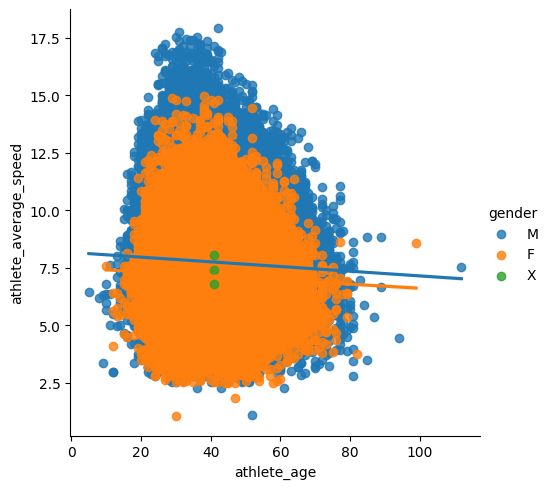

In [ ]:
sns.lmplot(x='athlete_age', y='athlete_average_speed', data=df2, hue='gender')

In [ ]:
df['Athlete gender'].value_counts()

,count
Athlete gender,
M,6035358
F,1425784
X,46


In [ ]:
df2.dtypes

,0
race_day,object
race_name,object
race_distance,object
number_of_finishers,int64
athlete_performance,object
gender,object
athlete_average_speed,float64
athlete_id,int64
athlete_age,int64


In [ ]:
df2.groupby(['gender', 'race_distance'])['athlete_average_speed'].mean()

gender  race_distance
F       50km             7.184350
        50mi             6.896128
M       50km             7.796158
        50mi             7.405032
X       50km             7.404000
        50mi             7.421500
Name: athlete_average_speed, dtype: float64